In [ ]:
!pip install geopandas
!pip install rioxarray

import numpy as np
import matplotlib.pyplot as plt
from math import *
import cv2
import geopandas as gpd
from google.colab import drive
import os
import pickle
import rioxarray
from pyproj import CRS
import fiona

drive.mount("/content/drive")
os.chdir('/content/drive/MyDrive/DREAMS - Zhiang/Projects/Rock Traits/data')
print(os.listdir())

     |████████████████████████████████| 994 kB 42.8 MB/s 
     |████████████████████████████████| 6.6 MB 21.9 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.7.0-py3-none-any.whl size=53826 sha256=be089a9ec03d02bedcef87fb2f513766387fbed333ed15cf75a81542fccac954
  Stored in directory: /root/.cache/pip/wheels/64/25/e2/1d0324f336102268cae46738e21018b35b23a5adc3f9088a38
Successfully built rioxarray
Mounted at /content/drive
['usa', 'global', 'README', 'outputs', 'L2_data', 'registered_instances_c3_rgbd1.pickle', 'registered_instances_c3_rgbd1_refined.pickle', 'registered_instances_c3_rgbd1_refined_update.pickle', 'california', 'C3.tif', 'c3_rocks', 'registered_instances_c3_rgbd1_update.pi

## read txt file

In [ ]:
handle = open('Bishop_scarp_height_scott_etal.txt', 'r')
data_str = handle.read()
data_str = data_str.split('\n')
data_str = [point.split() for point in data_str]
data = np.asarray([[float(i) for i in point] for point in data_str][:-1])
print(data.shape)

(138652, 3)


## create shapefile

In [ ]:
# open a tif raster and read attributes 
c3 = rioxarray.open_rasterio("C3.tif")

In [ ]:
# attributes
print(c3.rio.crs)
print(c3.rio.nodata)
print(c3.rio.bounds())
print(c3.rio.width)
print(c3.rio.height)
print(c3.rio.resolution())

EPSG:32611
None
(372333.78378156334, 4145784.9609071277, 372544.16285686305, 4146294.8455599267)
10589
25664
(0.019867699999973145, -0.019867699999960856)


In [ ]:
epsg = c3.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# 1. define schema
# ref: https://hatarilabs.com/ih-en/how-to-create-a-pointlinepolygon-shapefile-with-python-and-fiona-tutorial
schema = {
    'geometry':'Point',
    'properties':[('Height','float')]
}

# 2. open a write file
polyShp = fiona.open('Bishop_scarp_height/bishop_scarp_height.shp', mode='w', driver='ESRI Shapefile', schema = schema, crs = c3.rio.crs)

# 3. add polygons to file
for d in data:
  rowDict = {'geometry' : {'type':'Point', 'coordinates': [d[0], d[1]]}, 'properties': {'Height': d[2]}}
  polyShp.write(rowDict)

# 4. write file
polyShp.close()

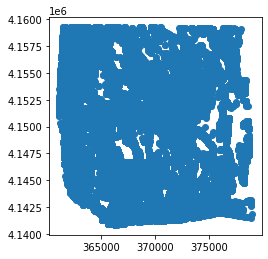

In [ ]:
height_shape = gpd.read_file("Bishop_scarp_height/bishop_scarp_height.shp")
height_shape.plot()

In [ ]:
longitude0, latitude0, longitude1, latitude1 = c3.rio.bounds()
c3_height_shape = height_shape.cx[longitude0:longitude1, latitude0:latitude1]

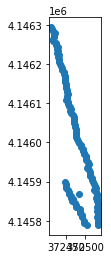

In [ ]:
c3_height_shape.plot()

In [ ]:
c3_height_shape.to_file('Bishop_scarp_height/c3_scarp_height.shp')